In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Premiere Partie

In [59]:
df = pd.read_csv('Dataset-Exos2.csv')
df 

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
994,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN


In [60]:
dfn = df[:115]
dfn

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
110,Jeff,24.0,Entertainment,hd
111,Billy,26.0,Howto & Style,sd
112,Clark,28.0,Science & Technology,hd
113,Billy,24.0,Entertainment,sd


In [61]:
valeurs_nulles = dfn.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

Watcher               0
videoCategoryId       0
videoCategoryLabel    0
definition            3
dtype: int64

In [62]:
mode_value = dfn['definition'].mode()[0]  # Trouver le mode
dfn['definition'].fillna(mode_value, inplace=True)
mode_value

C:\Users\AHM\AppData\Local\Temp\ipykernel_8408\2628392972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['definition'].fillna(mode_value, inplace=True)


'hd'

In [63]:
valeurs_nulles = dfn.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

Watcher               0
videoCategoryId       0
videoCategoryLabel    0
definition            0
dtype: int64

In [64]:
def generate_box_plot(data, attribute_name, show_outliers=True):
    fig, ax = plt.subplots()
    
    if show_outliers:
        ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)
    
    plt.title(f"Boîte à Moustache de {attribute_name}")
    plt.grid(True)
    plt.show()

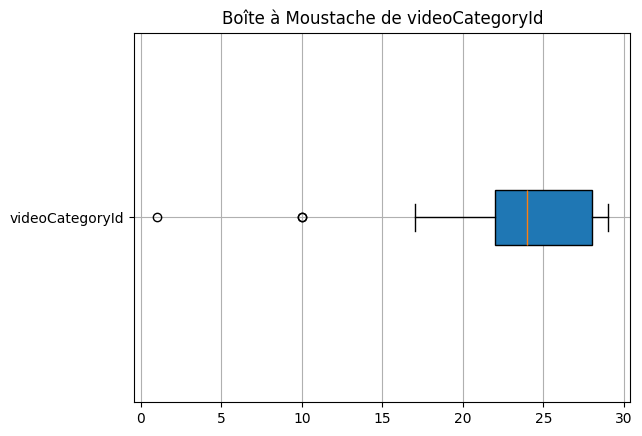

In [65]:
generate_box_plot(dfn['videoCategoryId'],'videoCategoryId', show_outliers=True)

In [66]:
quantiles = np.percentile(dfn['videoCategoryId'], [25, 50, 75])
q1, q2, q3 =  quantiles[0], quantiles[1], quantiles[2]

In [67]:
iqr = q3 - q1
mn = q1 - (1.5 * iqr)
mx = q3 + (1.5 * iqr)

In [68]:
dfnn = dfn[(dfn.videoCategoryId>=(mn)) & (dfn.videoCategoryId<=mx)]

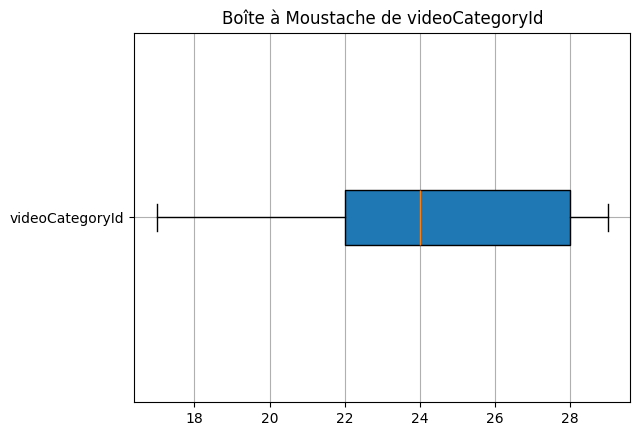

In [69]:
generate_box_plot(dfnn['videoCategoryId'],'videoCategoryId', show_outliers=True)

In [70]:
category_counts = dfnn['videoCategoryLabel'].value_counts()
category_counts

videoCategoryLabel
People & Blogs           43
Science & Technology     30
Nonprofits & Activism    10
Entertainment            10
Education                 8
News & Politics           6
Travel & Events           1
Sports                    1
Gaming                    1
Comedy                    1
Howto & Style             1
Name: count, dtype: int64

In [71]:
df3n = dfnn[dfnn["videoCategoryLabel"].map(dfnn["videoCategoryLabel"].value_counts()) >= 5]

In [72]:
category_counts = df3n['videoCategoryLabel'].value_counts()
category_counts

videoCategoryLabel
People & Blogs           43
Science & Technology     30
Nonprofits & Activism    10
Entertainment            10
Education                 8
News & Politics           6
Name: count, dtype: int64

In [73]:
df3n

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
109,Loan,22.0,People & Blogs,hd
110,Jeff,24.0,Entertainment,hd
112,Clark,28.0,Science & Technology,hd
113,Billy,24.0,Entertainment,sd


In [74]:
valeurs_nulles = df3n.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

Watcher               0
videoCategoryId       0
videoCategoryLabel    0
definition            0
dtype: int64

In [75]:
df3n['videoCategoryId'].unique()

array([29., 22., 24., 25., 28., 27.])

In [76]:
# Créer un dataset transactionnel en regroupant les vidéos regardées par chaque utilisateur
Dataset2_bis = df3n.groupby('Watcher ').apply(lambda x: x['videoCategoryId'].values.tolist()).reset_index()
Dataset2_bis.columns = ['Watcher', 'Transactions']
Dataset2_bis

,Watcher,Transactions
0,Adam,[22.0]
1,Alex,"[22.0, 22.0]"
2,Amy,[22.0]
3,Babs,"[22.0, 22.0]"
4,Ben,[22.0]
5,Billy,"[29.0, 22.0, 24.0, 28.0, 24.0]"
6,Bob,"[22.0, 28.0, 27.0]"
7,Brad,"[28.0, 22.0, 22.0, 29.0, 22.0]"
8,Chandler,[28.0]
9,Clark,"[22.0, 28.0]"


# Deuxieme Partie

Support: supp_min = Le support est défini comme la fréquence ou la proportion minimale à laquelle un item (ou un ensemble d'items) doit apparaître dans un ensemble de transactions pour être considéré comme fréquent.

In [77]:
from itertools import combinations
import pandas as pd

def generate_candidates(transactions, k):
    # Crée un dictionnaire pour compter le support des itemsets
    itemset_counts = {}
    
    # Parcourt chaque transaction pour compter les itemsets de taille k
    for transaction in transactions:
        # Utilise combinations pour générer les combinaisons de k éléments
        k_itemsets = list(combinations(transaction, k))
        
        # Incrémente le compteur pour chaque itemset dans la transaction
        for itemset in k_itemsets:
            if itemset in itemset_counts:
                itemset_counts[itemset] += 1
            else:
                itemset_counts[itemset] = 1
    
    # Filtre les itemsets candidats ayant un support suffisant
    candidate_itemsets = [itemset for itemset, count in itemset_counts.items() if count >= k]
    return candidate_itemsets

# Exemple : Générer les k-itemsets candidats à partir de la colonne 'Transactions' de votre DataFrame
k = 3  # Spécifiez la taille des itemsets que vous souhaitez générer
transactions = Dataset2_bis['Transactions'].tolist()
candidates = generate_candidates(transactions, k)
print(candidates)


[(29.0, 22.0, 28.0), (28.0, 22.0, 22.0), (22.0, 22.0, 29.0), (22.0, 22.0, 22.0), (22.0, 29.0, 22.0), (25.0, 28.0, 24.0), (22.0, 28.0, 29.0), (24.0, 22.0, 29.0), (22.0, 29.0, 28.0), (29.0, 28.0, 22.0)]


In [78]:
def calculate_support(transactions, itemsets):
    # Compte le nombre d'occurrences de chaque itemset dans les transactions
    support_counts = {}
    
    for itemset in itemsets:
        for transaction in transactions:
            if all(item in transaction for item in itemset):
                if itemset in support_counts:
                    support_counts[itemset] += 1
                else:
                    support_counts[itemset] = 1
    
    return support_counts

# Exemple d'utilisation
k = 2  # Spécifiez la taille des itemsets pour lesquels vous souhaitez calculer le support
transactions = Dataset2_bis['Transactions'].tolist()
candidates = generate_candidates(transactions, k)  # Utilisez la fonction generate_candidates précédemment définie
support_counts = calculate_support(transactions, candidates)
print(support_counts)


{(22.0, 22.0): 31, (29.0, 22.0): 8, (29.0, 24.0): 3, (29.0, 28.0): 9, (22.0, 24.0): 5, (22.0, 28.0): 17, (24.0, 28.0): 4, (24.0, 24.0): 7, (28.0, 24.0): 4, (22.0, 27.0): 6, (28.0, 27.0): 5, (28.0, 22.0): 17, (28.0, 29.0): 9, (22.0, 29.0): 8, (28.0, 28.0): 24, (24.0, 27.0): 3, (24.0, 22.0): 5, (27.0, 22.0): 6, (27.0, 24.0): 3, (25.0, 28.0): 3, (25.0, 24.0): 3, (25.0, 27.0): 3, (28.0, 25.0): 3, (24.0, 25.0): 3, (27.0, 28.0): 5, (24.0, 29.0): 3, (29.0, 27.0): 3, (27.0, 29.0): 3}


In [79]:
def generate_frequent_itemsets(support_counts, k, min_support):
#     # Génère les k-itemsets candidats Ck
#     candidates = generate_candidates(transactions, k)
#     print('-----------------------------------------------------')
#     print("C:", candidates)
#     # Calcule le support de chaque candidat
#     support_counts = calculate_support(transactions, candidates)
    
    # Filtre les candidats ayant un support supérieur ou égal à min_support
    frequent_itemsets = [itemset for itemset, support in support_counts.items() if support >= min_support]
    
    return frequent_itemsets

# Exemple d'utilisation
k = 2  # Spécifiez la taille des itemsets que vous souhaitez générer
min_support = 3  # Définissez la valeur minimale de support pour les itemsets fréquents
transactions = Dataset2_bis['Transactions'].tolist()

frequent_itemsets = generate_frequent_itemsets(support_counts, k, min_support)
print(frequent_itemsets)


[(22.0, 22.0), (29.0, 22.0), (29.0, 24.0), (29.0, 28.0), (22.0, 24.0), (22.0, 28.0), (24.0, 28.0), (24.0, 24.0), (28.0, 24.0), (22.0, 27.0), (28.0, 27.0), (28.0, 22.0), (28.0, 29.0), (22.0, 29.0), (28.0, 28.0), (24.0, 27.0), (24.0, 22.0), (27.0, 22.0), (27.0, 24.0), (25.0, 28.0), (25.0, 24.0), (25.0, 27.0), (28.0, 25.0), (24.0, 25.0), (27.0, 28.0), (24.0, 29.0), (29.0, 27.0), (27.0, 29.0)]


In [80]:
def apriori_algorithm(transactions, min_support):
    k = 1
    frequent_itemsets = []
    
    frequent_itemsets_k = True
    
    while frequent_itemsets_k:
        
        # Génère les k-itemsets candidats Ck
        candidates = generate_candidates(transactions, k)
        print('-----------------------------------------------------')
        print("C:", candidates)
        # Calcule le support de chaque candidat
        support_counts = calculate_support(transactions, candidates)
        frequent_itemsets_k = generate_frequent_itemsets(support_counts, k, min_support)
             
        frequent_itemsets.extend(frequent_itemsets_k)
        print("L:",frequent_itemsets)
        print('-----------------------------------------------------')
        k += 1  # Incrémentez la taille des itemsets
    return frequent_itemsets

# Exemple d'utilisation
min_support = 3  # Définissez la valeur minimale de support
transactions = Dataset2_bis['Transactions'].tolist()

frequent_itemsets = apriori_algorithm(transactions, min_support)
print("=================================")
print(frequent_itemsets)

#Dans cet exemple, la fonction apriori_algorithm utilise les fonctions que vous avez définies pour générer des itemsets fréquents de toutes les tailles. L'algorithme s'arrête lorsque plus aucun itemset fréquent ne peut être trouvé. Ensuite, il renvoie tous les itemsets fréquents. Vous pouvez ajuster la valeur de min_support en fonction de vos besoins.


-----------------------------------------------------
C: [(22.0,), (29.0,), (24.0,), (28.0,), (27.0,), (25.0,)]
L: [(22.0,), (29.0,), (24.0,), (28.0,), (27.0,), (25.0,)]
-----------------------------------------------------
-----------------------------------------------------
C: [(22.0, 22.0), (29.0, 22.0), (29.0, 24.0), (29.0, 28.0), (22.0, 24.0), (22.0, 28.0), (24.0, 28.0), (24.0, 24.0), (28.0, 24.0), (22.0, 27.0), (28.0, 27.0), (28.0, 22.0), (28.0, 29.0), (22.0, 29.0), (28.0, 28.0), (24.0, 27.0), (24.0, 22.0), (27.0, 22.0), (27.0, 24.0), (25.0, 28.0), (25.0, 24.0), (25.0, 27.0), (28.0, 25.0), (24.0, 25.0), (27.0, 28.0), (24.0, 29.0), (29.0, 27.0), (27.0, 29.0)]
L: [(22.0,), (29.0,), (24.0,), (28.0,), (27.0,), (25.0,), (22.0, 22.0), (29.0, 22.0), (29.0, 24.0), (29.0, 28.0), (22.0, 24.0), (22.0, 28.0), (24.0, 28.0), (24.0, 24.0), (28.0, 24.0), (22.0, 27.0), (28.0, 27.0), (28.0, 22.0), (28.0, 29.0), (22.0, 29.0), (28.0, 28.0), (24.0, 27.0), (24.0, 22.0), (27.0, 22.0), (27.0, 24.0), (2

In [81]:
#generate_candidates(Dataset2_bis['Transactions'].iloc[2],1)
Dataset2_bis['Transactions'].iloc[0]

[22.0]

# 3eme Partie

Confiance: conf_min = C'est une mesure qui permet d'évaluer à quel point une règle d'association est fiable.

In [82]:
def generate_association_rules(Lk):
    association_rules=[]
    for itemset in Lk:
        itemset = set(itemset)
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent =set(antecedent)
                    consequent = itemset - antecedent
                    association_rules.append((antecedent,consequent))
    return association_rules                


In [83]:
V = generate_association_rules(frequent_itemsets)
V

[({29.0}, {22.0}),
 ({22.0}, {29.0}),
 ({24.0}, {29.0}),
 ({29.0}, {24.0}),
 ({28.0}, {29.0}),
 ({29.0}, {28.0}),
 ({24.0}, {22.0}),
 ({22.0}, {24.0}),
 ({28.0}, {22.0}),
 ({22.0}, {28.0}),
 ({24.0}, {28.0}),
 ({28.0}, {24.0}),
 ({24.0}, {28.0}),
 ({28.0}, {24.0}),
 ({27.0}, {22.0}),
 ({22.0}, {27.0}),
 ({27.0}, {28.0}),
 ({28.0}, {27.0}),
 ({28.0}, {22.0}),
 ({22.0}, {28.0}),
 ({28.0}, {29.0}),
 ({29.0}, {28.0}),
 ({29.0}, {22.0}),
 ({22.0}, {29.0}),
 ({24.0}, {27.0}),
 ({27.0}, {24.0}),
 ({24.0}, {22.0}),
 ({22.0}, {24.0}),
 ({27.0}, {22.0}),
 ({22.0}, {27.0}),
 ({24.0}, {27.0}),
 ({27.0}, {24.0}),
 ({25.0}, {28.0}),
 ({28.0}, {25.0}),
 ({24.0}, {25.0}),
 ({25.0}, {24.0}),
 ({25.0}, {27.0}),
 ({27.0}, {25.0}),
 ({25.0}, {28.0}),
 ({28.0}, {25.0}),
 ({24.0}, {25.0}),
 ({25.0}, {24.0}),
 ({27.0}, {28.0}),
 ({28.0}, {27.0}),
 ({24.0}, {29.0}),
 ({29.0}, {24.0}),
 ({27.0}, {29.0}),
 ({29.0}, {27.0}),
 ({27.0}, {29.0}),
 ({29.0}, {27.0}),
 ({28.0}, {22.0, 29.0}),
 ({29.0}, {22.0, 28.0}),


In [84]:
def calculate_confidence(transactions, antecedent, consequence):
    support_A_B = sum(1 for transaction in transactions if antecedent.issubset(transaction) and consequence.issubset(transaction))

    support_A = sum(1 for transaction in transactions if antecedent.issubset(transaction))

    confidence = support_A_B / support_A if support_A > 0 else 0
    return confidence


In [85]:
for item in V:
    single_set = item[0]
    single_set1 = item[1]
    print(f"{single_set}","=>",f"{single_set1}")
    print("confiance : ",calculate_confidence(transactions, single_set, single_set1))



{29.0} => {22.0}
confiance :  0.8888888888888888
{22.0} => {29.0}
confiance :  0.25806451612903225
{24.0} => {29.0}
confiance :  0.42857142857142855
{29.0} => {24.0}
confiance :  0.3333333333333333
{28.0} => {29.0}
confiance :  0.375
{29.0} => {28.0}
confiance :  1.0
{24.0} => {22.0}
confiance :  0.7142857142857143
{22.0} => {24.0}
confiance :  0.16129032258064516
{28.0} => {22.0}
confiance :  0.7083333333333334
{22.0} => {28.0}
confiance :  0.5483870967741935
{24.0} => {28.0}
confiance :  0.5714285714285714
{28.0} => {24.0}
confiance :  0.16666666666666666
{24.0} => {28.0}
confiance :  0.5714285714285714
{28.0} => {24.0}
confiance :  0.16666666666666666
{27.0} => {22.0}
confiance :  0.75
{22.0} => {27.0}
confiance :  0.1935483870967742
{27.0} => {28.0}
confiance :  0.625
{28.0} => {27.0}
confiance :  0.20833333333333334
{28.0} => {22.0}
confiance :  0.7083333333333334
{22.0} => {28.0}
confiance :  0.5483870967741935
{28.0} => {29.0}
confiance :  0.375
{29.0} => {28.0}
confiance :  1.0